# STEP1 :import Requried libraries

In [21]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Downloads\movie_metadata.csv")
df.head()
df.info()
df.describe(include="all")
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

 # 2. Create IMDB class (Hit/Average/Flop)

In [23]:
bins = [1, 3, 6, 10]
labels = ["Flop", "Average", "Hit"]
df["Classify"] = pd.cut(df["imdb_score"], bins=bins, labels=labels, include_lowest=True)

print(df["Classify"].value_counts(dropna=False))


Classify
Hit        3458
Average    1539
Flop         46
Name: count, dtype: int64


# 3. Identify data problems

In [24]:
df.isna().sum()          # count missing per column
df.duplicated().sum()    # full-row duplicates
df["movie_title"] = df["movie_title"].astype(str).str.strip()
df["genres"].value_counts().head() 


genres
Drama                   236
Comedy                  209
Comedy|Drama            191
Comedy|Drama|Romance    187
Comedy|Romance          158
Name: count, dtype: int64

# 4. Remove duplicates

In [25]:
df.drop_duplicates()
df.dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Classify
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Hit
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Hit
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Hit
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Hit
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,Hit
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,Hit
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,Hit
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,Hit


# 5. Clean and preprocess 

In [26]:
num_cols = ["duration", "gross", "budget", "num_voted_users",
            "cast_total_facebook_likes", "num_critic_for_reviews",
            "num_user_for_reviews"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df

In [27]:
df = df.dropna(subset=["imdb_score"])

In [28]:
df["movie_title"] = df["movie_title"].astype(str).str.strip()
df["content_rating"] = df["content_rating"].fillna("Unknown")
df["language"] = df["language"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

# 6. Explore patterns

In [29]:
for col in num_cols:
   df.fillna({col: df[col].median()}, inplace=True)


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of IMDb scores')

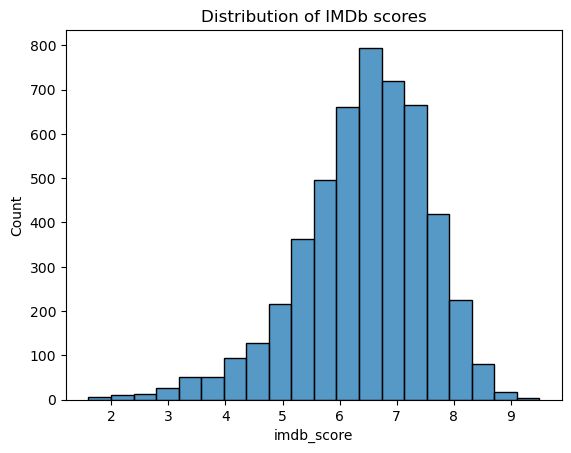

In [31]:
sns.histplot(df["imdb_score"], bins=20)
plt.title("Distribution of IMDb scores")

In [32]:
df.groupby("content_rating")["imdb_score"].mean().sort_values(ascending=False).head(10)

content_rating
TV-MA       8.250000
TV-Y        7.400000
TV-PG       7.353846
Approved    7.325455
TV-14       7.250000
TV-Y7       7.200000
Passed      7.166667
Unrated     6.920968
TV-G        6.920000
GP          6.916667
Name: imdb_score, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

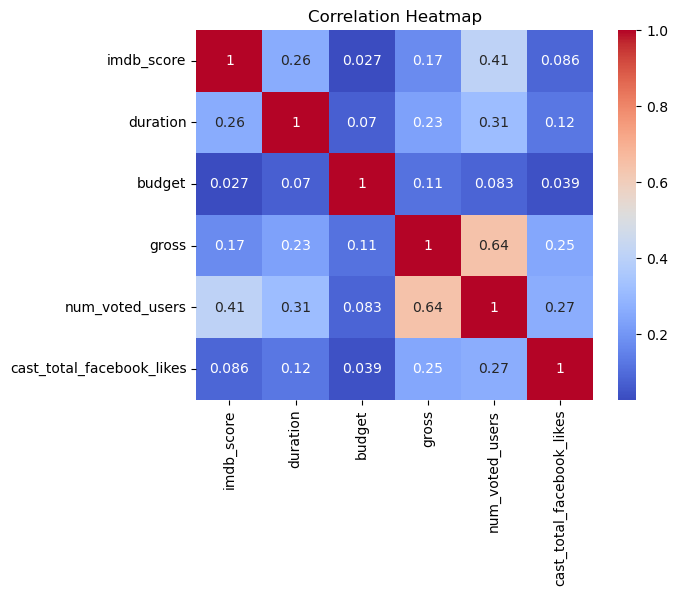

In [33]:
corr_cols = ["imdb_score", "duration", "budget", "gross",
             "num_voted_users", "cast_total_facebook_likes"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Budget vs Gross')

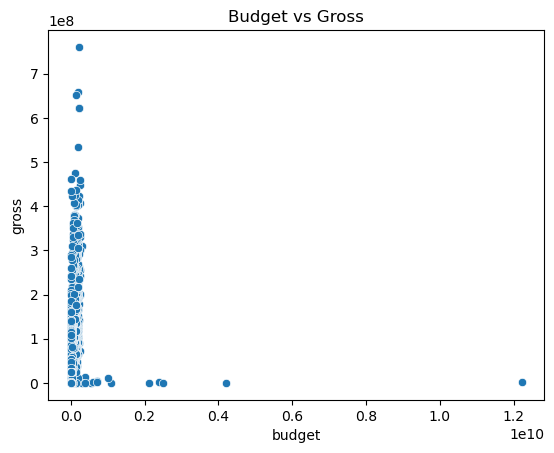

In [34]:
sns.scatterplot(data=df, x="budget", y="gross")
plt.title("Budget vs Gross")

# 5.define and solve a prediction problem

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [37]:
features = ["duration", "budget", "gross",
            "num_voted_users", "cast_total_facebook_likes"]
X = df[features]
y = df["imdb_score"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(0.7834462299474082, 0.17225907931348772)